In [1]:
import keras
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
import numpy as np

In [4]:
print(x_train.shape)
x_train = np.expand_dims(x_train, axis=-1)
print(x_train.shape)
x_train = np.repeat(x_train, 3, axis=-1)
print(x_train.shape)
x_train = x_train.astype('float32') / 255
x_train = tf.image.resize(x_train, [32,32]) 
print(x_train.shape) 

(60000, 28, 28)
(60000, 28, 28, 1)
(60000, 28, 28, 3)
(60000, 32, 32, 3)


In [5]:
x_test = np.expand_dims(x_test, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)
x_test = x_test.astype('float32') / 255
x_test = tf.image.resize(x_test, [32, 32])
print(x_test.shape)

(10000, 32, 32, 3)


In [6]:
# because working with np array is non-trivial
x_test = np.array(x_test)
x_train = np.array(x_train)

In [7]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

x_validation = x_train[50000:]
y_validation = y_train[50000:]

x_train = x_train[:50000]
y_train = y_train[:50000]



print(x_validation.shape)
print(y_validation.shape)
print(x_train.shape)
print(y_train.shape)
print(y_train[5000])

(10000, 32, 32, 3)
(10000, 10)
(50000, 32, 32, 3)
(50000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [8]:
print(y_validation[100])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


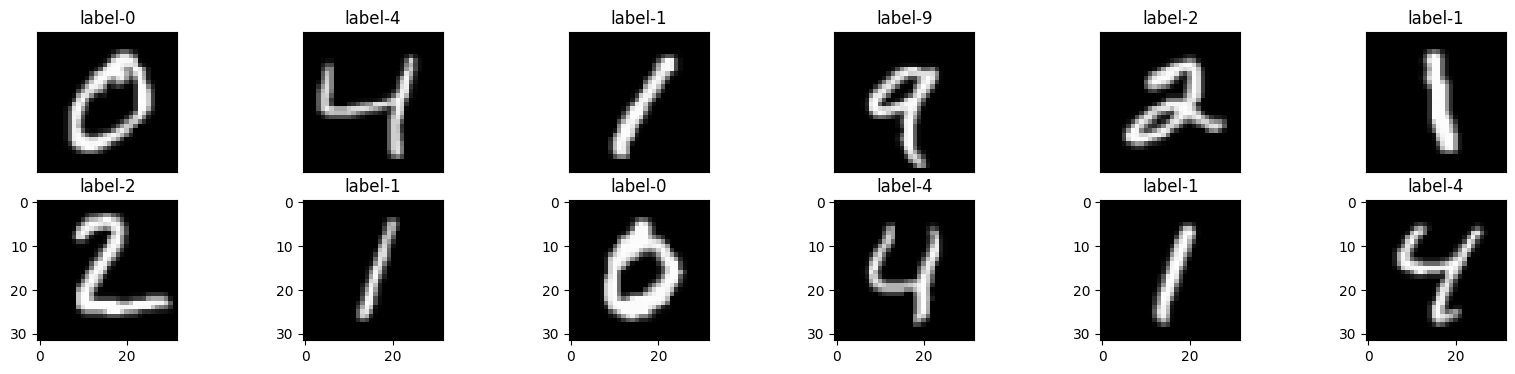

In [9]:
import matplotlib.pyplot as plt
n = 6
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_train[i])
    plt.gray()
    ax.title.set_text("label-{0}".format(np.argmax(y_train[i]) ) )
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+n)
    plt.imshow(x_test[i])
    plt.gray()
    ax.title.set_text("label-{0}".format(np.argmax(y_test[i]) ) )
    
plt.show()

[how-to-remove-the-last-layer-from-trained-model-in-tensorflow](https://stackoverflow.com/questions/55392591/how-to-remove-the-last-layer-from-trained-model-in-tensorflow)

In [10]:
vgg_model = tf.keras.applications.VGG16(weights='imagenet',
                                      include_top=False,
                                        input_shape=(32, 32, 3)
                                      )
vgg_model.summary()
print(len(vgg_model.layers))
vgg_model.trainable=False 
x = vgg_model.layers[-1].output #
x = keras.layers.Flatten()(x)
output = keras.layers.Dense(10, activation='softmax')(x)

model = keras.Model(vgg_model.input, output)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=tf.keras.metrics.CategoricalAccuracy())

history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_validation, y_validation))

Epoch 1/5
391/391 [==============================] - 111s 235ms/step - loss: 1.1167 - categorical_accuracy: 0.7150 - val_loss: 0.6359 - val_categorical_accuracy: 0.8537
Epoch 2/5
391/391 [==============================] - 89s 227ms/step - loss: 0.5513 - categorical_accuracy: 0.8648 - val_loss: 0.4340 - val_categorical_accuracy: 0.8940
Epoch 3/5
391/391 [==============================] - 88s 226ms/step - loss: 0.4131 - categorical_accuracy: 0.8964 - val_loss: 0.3453 - val_categorical_accuracy: 0.9173
Epoch 4/5
391/391 [==============================] - 87s 223ms/step - loss: 0.3429 - categorical_accuracy: 0.9131 - val_loss: 0.2926 - val_categorical_accuracy: 0.9281
Epoch 5/5
391/391 [==============================] - 87s 222ms/step - loss: 0.2990 - categorical_accuracy: 0.9232 - val_loss: 0.2619 - val_categorical_accuracy: 0.9338


In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

313/313 [==============================] - 30s 89ms/step - loss: 0.2688 - categorical_accuracy: 0.9324
Accuracy: 0.9323999881744385
Loss:  0.2687946856021881


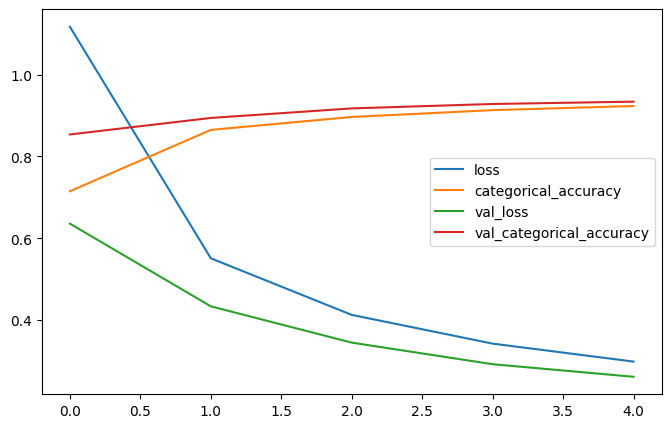

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

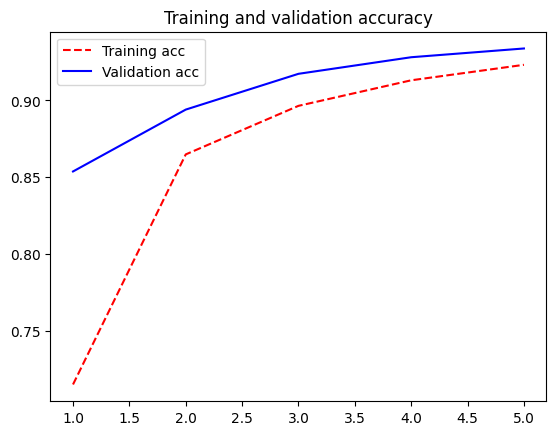

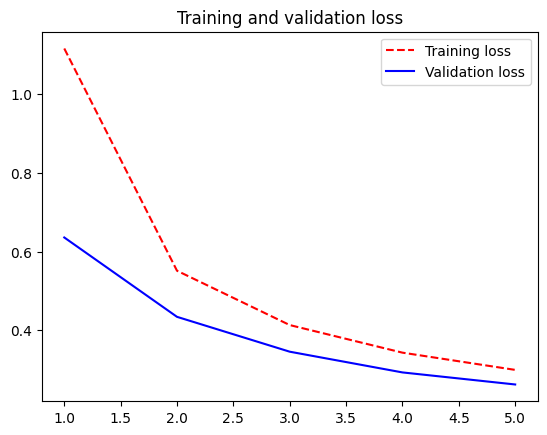

In [25]:
def plot_accuracy_and_loss(history):
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, '--r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, '--r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_accuracy_and_loss(history)

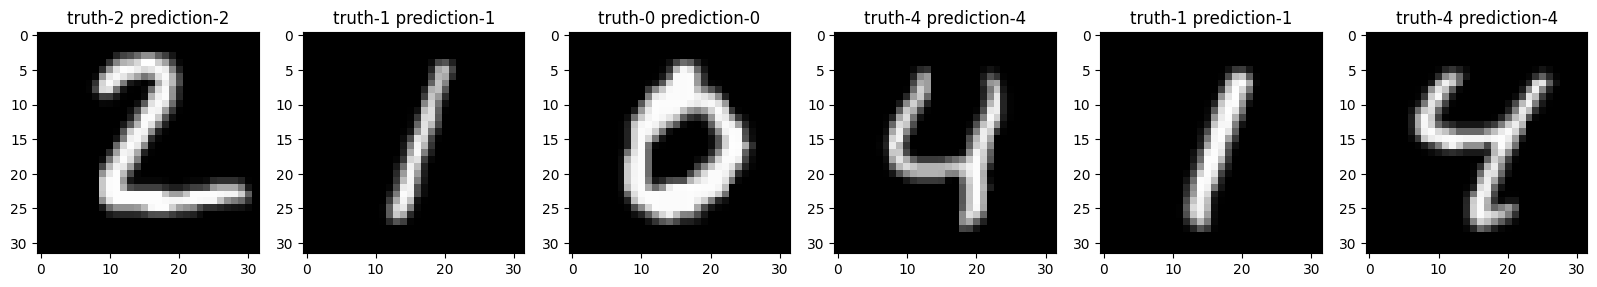

In [26]:
# prediction from trained model
predictions = model.predict(x_test)

n = 6
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test[i])
    plt.gray()
    ax.title.set_text("truth-{0} prediction-{1}".format(np.argmax(y_test[i]), np.argmax(predictions[i]) ) )
    
plt.show()